In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# 假设importance.csv包含Feature列和Importance列
csv_file1_path = "C:/Users/Lenovo/Desktop/new_study/CNS/output/XGBoost_importance.csv"
csv_file2_path = "C:/Users/Lenovo/Desktop/new_study/CNS/data/ASP.csv"

# 读取Features CSV文件
features_df = pd.read_csv(csv_file1_path)
# 读取训练集和Label的CSV文件
training_data_df = pd.read_csv(csv_file2_path)

In [24]:
print(features_df)

                     Feature  Importance
0          _NormalizedVDWVC3    0.183809
1                         LI    0.114753
2              charge of all    0.083309
3            negative_charge    0.063642
4                         VV    0.057507
5                         KV    0.041703
6                         LC    0.040330
7                _PolarityC3    0.033620
8                         NR    0.031391
9                _PolarityC2    0.028959
10      _NormalizedVDWVD1100    0.023444
11                _ChargeT23    0.021982
12                        AT    0.020903
13                        KG    0.019230
14                        QF    0.016669
15            unpolar_number    0.015251
16              _ChargeD3100    0.014562
17                        IK    0.014114
18                        HH    0.013910
19              _ChargeD3075    0.013209
20  _SolventAccessibilityT23    0.011879
21                        GG    0.011841
22                        LF    0.010707
23              

In [25]:
print(training_data_df)

                                  SEQUENCE       A       R       N       D  \
0                              IKQLLHFFQRF   0.000   9.091   0.000   0.000   
1                     RLLRRLLRRLLRRLLRRLLR   0.000  50.000   0.000   0.000   
2                  GIGKFLHSAKKFGKAFVGEIMNS   8.696   0.000   4.348   0.000   
3                              LKRFLKWFKRF   0.000  18.182   0.000   0.000   
4                              KLFKRWKHLFR   0.000  18.182   0.000   0.000   
...                                    ...     ...     ...     ...     ...   
1195         AVEFLLDQSIADSPLAKKVEFLESKGLTQ  10.345   0.000   0.000   6.897   
1196           GQTSISKGLNYLTIMAPGNLWHMRNNF   3.704   3.704  14.815   0.000   
1197    WGYSKHNGPENWHKDFPIANGDRQSPVDIDTATA   8.824   2.941   8.824  11.765   
1198        IELFNAFPSLLRHFPGSHNTIFKNMTEQRK   3.333   6.667  10.000   0.000   
1199  RLGLLLSVLAATLAQAPAPDVPGCSRGSCYPATGDL  16.667   5.556   0.000   5.556   

          C       E       Q       G      H  ...  _Polarizabilit

In [26]:
# ascending=False，降序排列
top_features = features_df.sort_values(by="Importance", ascending=False).head(22)['Feature'].tolist()
print(top_features)

['_NormalizedVDWVC3', 'LI', 'charge of all', 'negative_charge', 'VV', 'KV', 'LC', '_PolarityC3', 'NR', '_PolarityC2', '_NormalizedVDWVD1100', '_ChargeT23', 'AT', 'KG', 'QF', 'unpolar_number', '_ChargeD3100', 'IK', 'HH', '_ChargeD3075', '_SolventAccessibilityT23', 'GG']


In [27]:
# 从原始数据集中获得前22的列
selected_columns = training_data_df[top_features]
print(selected_columns)

      _NormalizedVDWVC3   LI  charge of all  negative_charge   VV    KV   LC  \
0                 0.545  0.0              3                0  0.0  0.00  0.0   
1                 0.500  0.0             10                0  0.0  0.00  0.0   
2                 0.391  0.0              4                1  0.0  0.00  0.0   
3                 0.818  0.0              5                0  0.0  0.00  0.0   
4                 0.818  0.0              6                0  0.0  0.00  0.0   
...                 ...  ...            ...              ...  ...   ...  ...   
1195              0.172  0.0             -2                5  0.0  3.57  0.0   
1196              0.296  0.0              3                0  0.0  0.00  0.0   
1197              0.265  0.0              0                5  0.0  0.00  0.0   
1198              0.367  0.0              4                2  0.0  0.00  0.0   
1199              0.083  0.0              0                2  0.0  0.00  0.0   

      _PolarityC3   NR  _PolarityC2  ..

In [28]:
# 获取应变量标签
y = training_data_df["MIC"]
print(y)
y = np.log(y)
print(y)
# 初始化线性回归模型
linear_regressor = LinearRegression()

0         24.00
1         32.00
2        128.00
3          8.00
4         31.25
         ...   
1195    8192.00
1196    8192.00
1197    8192.00
1198    8192.00
1199    8192.00
Name: MIC, Length: 1200, dtype: float64
0       3.178054
1       3.465736
2       4.852030
3       2.079442
4       3.442019
          ...   
1195    9.010913
1196    9.010913
1197    9.010913
1198    9.010913
1199    9.010913
Name: MIC, Length: 1200, dtype: float64


In [29]:
# 划分数据集和测试集
X_train, X_test, y_train, y_test = train_test_split(selected_columns, y, test_size=0.2, random_state=0)
# 初始化标准化器
scaler = StandardScaler()
# 对每一列数据进行标准化
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

print(X_train)
print('---------------------------------------------------------------------------')
print(X_train_standardized)

      _NormalizedVDWVC3   LI  charge of all  negative_charge   VV   KV    LC  \
867               0.231  0.0              2                0  0.0  0.0  8.33   
741               0.235  0.0              0                4  2.0  0.0  0.00   
467               0.129  0.0             -2                3  0.0  0.0  0.00   
442               0.031  0.0            -10               10  0.0  0.0  0.00   
610               0.083  0.0             -2                3  0.0  0.0  0.00   
...                 ...  ...            ...              ...  ...  ...   ...   
1033              0.385  0.0              3                1  0.0  0.0  0.00   
763               0.300  0.0              3                0  0.0  0.0  0.00   
835               0.357  0.0              1                2  0.0  0.0  0.00   
559               0.294  0.0              1                2  0.0  0.0  0.00   
684               0.341  2.5              5                1  0.0  0.0  0.00   

      _PolarityC3   NR  _PolarityC2  ..

In [30]:
# 拟合模型
linear_regressor.fit(X_train_standardized, y_train)

# 预测模型
y_pred = linear_regressor.predict(X_test_standardized)

In [31]:
# 计算回归分析的评估指标
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印结果
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.1889501788161585
Mean Absolute Error: 1.097272576302071
R-squared: 0.5807119261370278


In [32]:
# 获取特征系数
coefficients = linear_regressor.coef_
coefficients_df = pd.DataFrame({'Feature': top_features, 'Coefficient': coefficients})
# 按照系数降序排列
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
# 打印每个特征的系数
for feature, coef in zip(top_features, coefficients):
    print(f"{feature}: {coef}")

_NormalizedVDWVC3: -0.5862503522526096
LI: -0.02897794308936341
charge of all: -0.5375929526911531
negative_charge: -0.5243569191770658
VV: -0.03863816266562228
KV: -0.11525211526888324
LC: 0.19581975672547028
_PolarityC3: -0.1804141013939521
NR: -0.04292100560418019
_PolarityC2: 0.12201257192528517
_NormalizedVDWVD1100: 0.31872722267418285
_ChargeT23: 0.12163420166585895
AT: 0.009856169863732028
KG: -0.07637734205949426
QF: -0.3073622521128345
unpolar_number: 0.4158876442018398
_ChargeD3100: 0.6710450918014953
IK: -0.1754224749728817
HH: -0.031032606594757962
_ChargeD3075: -0.23694647987709547
_SolventAccessibilityT23: 0.4405454064657871
GG: -0.16491295870477157


In [33]:
coefficients_df.to_csv("C:/Users/Lenovo/Desktop/new_study/CNS/output/XGBoost_regression_coefficients.csv", index=False) #不将 DataFrame 的索引写入到 CSV 文件。

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28760\2447835501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette=colors)


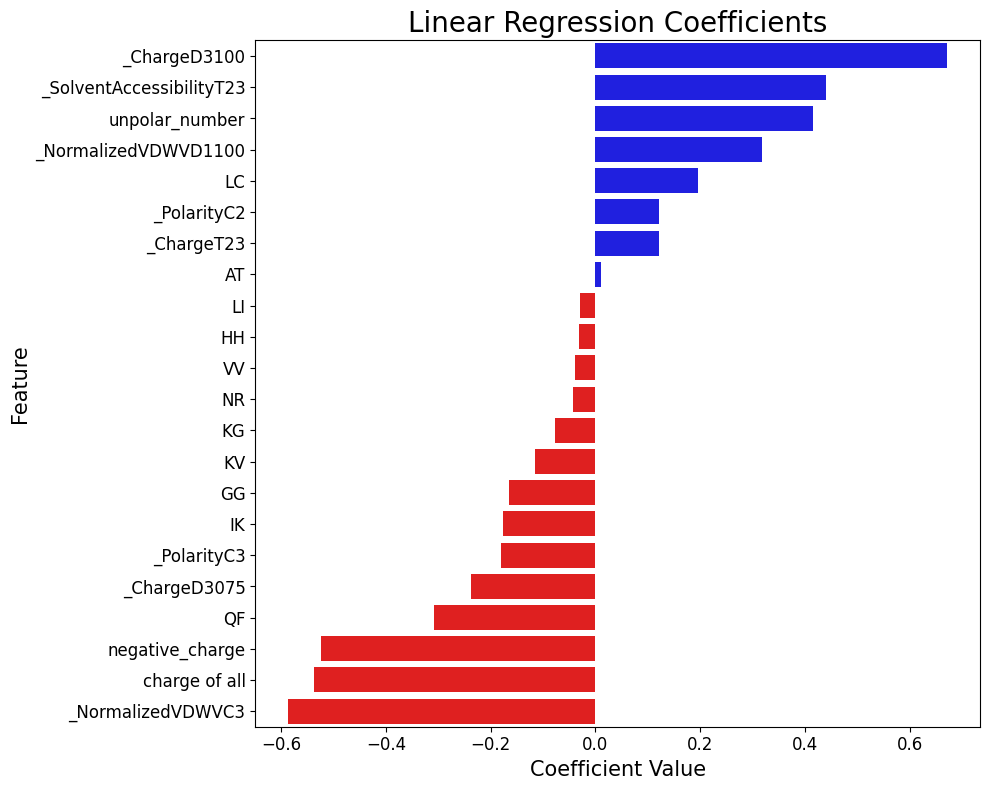

In [34]:
# 按照Coefficient列排序，大的值在上面
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# 设置图形大小
plt.figure(figsize=(10, 8))

# 为正负系数分配颜色
colors = ['b' if coef > 0 else 'r' for coef in coefficients_df['Coefficient']]

# 使用seaborn的barplot函数创建一个横向的柱状图，加入颜色映射
sns.barplot(x='Coefficient', y='Feature', data=coefficients_df, palette=colors)

plt.title('Linear Regression Coefficients', fontsize=20)
plt.xlabel('Coefficient Value', fontsize=15)
plt.ylabel('Feature', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 自动调整布局
plt.tight_layout()

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/XGBoost_regression_coefficients_figures.png")

# 显示图形
plt.show()

In [ ]:
#获得截距
intercept = linear_regressor.intercept_
print(intercept)
intercept_term = f"{intercept}"
# 构建线性回归方程
equation = " + ".join(f"{row['Coefficient']} * {row['Feature']}" for index, row in coefficients_df.iterrows())
linear_regression_expression = f"y = {equation} + {intercept_term}"
print(linear_regression_expression)

In [35]:
# 使用生成的表达式进行回归值的预测
def predict_regression_value(features, coefficients):
    return features @ coefficients + intercept

selected_regression_features = coefficients_df['Feature'].tolist()

selected_regression_features_value = training_data_df[selected_regression_features]

coefficients_list = coefficients_df['Coefficient'].tolist()
coefficients_array = np.array(coefficients_list)

# 初始化标准化器
scaler = StandardScaler()
# 对每一列数据进行标准化
selected_regression_features_value_standardized = scaler.fit_transform(selected_regression_features_value)
#print(selected_regression_features_value)
#print(selected_regression_features_value_standardized)


In [36]:
predicted_regression_value = predict_regression_value(selected_regression_features_value_standardized, coefficients_array)

predicted_regression_value_df = pd.DataFrame({'Value':predicted_regression_value})
print(predicted_regression_value_df)


          Value
0      3.190330
1      3.050736
2      7.604677
3      2.587661
4      2.724858
...         ...
1195   9.264351
1196   7.286879
1197   9.172533
1198   8.636312
1199  10.148186

[1200 rows x 1 columns]


In [37]:
# 从原始数据集中获取LABEL
LABEL_values = pd.DataFrame({'LABEL':training_data_df['LABEL']})
# print(LABEL_values)
# 合并两个DataFrame
merged_df = pd.concat([predicted_regression_value_df, LABEL_values], axis=1)

# 划分两类
AMP_predicted = merged_df[merged_df['LABEL'] == 1]
NON_AMP_predicted = merged_df[merged_df['LABEL'] == 0]

#扔掉非零项
AMP_predicted_clean = AMP_predicted.dropna()
NON_AMP_predicted_clean = NON_AMP_predicted.dropna()

# 求"Value"列的平均值
average_value = AMP_predicted_clean['Value'].mean()

print(AMP_predicted_clean)
print(NON_AMP_predicted_clean)
#print(average_value)

        Value  LABEL
0    3.190330      1
1    3.050736      1
2    7.604677      1
3    2.587661      1
4    2.724858      1
..        ...    ...
201  3.298779      1
202  3.698032      1
203  5.652706      1
204  3.698032      1
205  4.017149      1

[206 rows x 2 columns]
          Value  LABEL
206    9.092326      0
207    7.251679      0
208    9.956185      0
209    7.959229      0
210    9.598852      0
...         ...    ...
1195   9.264351      0
1196   7.286879      0
1197   9.172533      0
1198   8.636312      0
1199  10.148186      0

[994 rows x 2 columns]


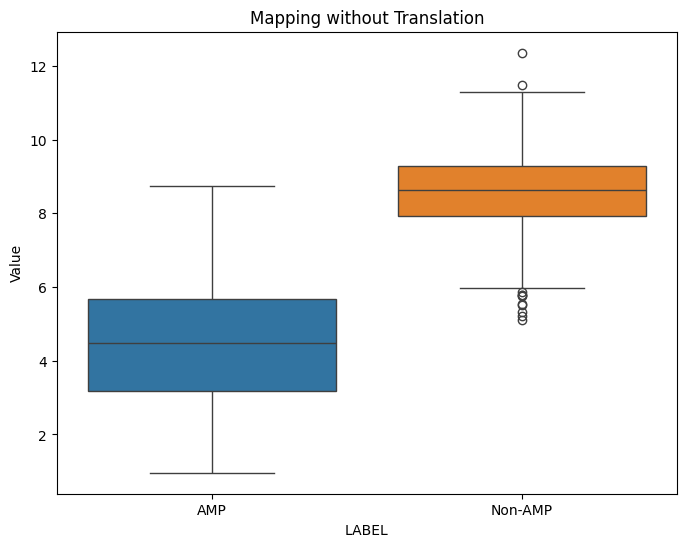

In [38]:
# 合并两个DataFrame
merged_final_df = pd.concat([AMP_predicted_clean, NON_AMP_predicted_clean], ignore_index=True)
merged_final_df['LABEL'] = merged_final_df['LABEL'].replace({0: 'Non-AMP', 1: 'AMP'})
# 使用Seaborn绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='LABEL', y='Value', hue='LABEL', data=merged_final_df)
plt.title('Mapping without Translation')

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/XGBoost_regression_boxplot_figures.png")

plt.show()

In [39]:
def sig(x):
    return 1/(1 + np.exp((x - np.log(600))))


# 使用 sig 函数映射到 0-1 范围
transformed_values = sig(predicted_regression_value)
transformed_values_df = pd.DataFrame({'Value':transformed_values})

print(transformed_values_df)

         Value
0     0.961082
1     0.965980
2     0.230100
3     0.978316
4     0.975207
...        ...
1195  0.053788
1196  0.291120
1197  0.058657
1198  0.096269
1199  0.022949

[1200 rows x 1 columns]


In [40]:
# 从原始数据集中获取LABEL
LABEL_values = pd.DataFrame({'LABEL':training_data_df['LABEL']})
print(LABEL_values)

      LABEL
0         1
1         1
2         1
3         1
4         1
...     ...
1195      0
1196      0
1197      0
1198      0
1199      0

[1200 rows x 1 columns]


In [41]:
# 合并两个DataFrame
merged_df = pd.concat([transformed_values_df, LABEL_values], axis=1)

# 划分两类
AMP_predicted = merged_df[merged_df['LABEL'] == 1]
NON_AMP_predicted = merged_df[merged_df['LABEL'] == 0]

AMP_predicted_clean = AMP_predicted.dropna()
NON_AMP_predicted_clean = NON_AMP_predicted.dropna()

# 求"Value"列的平均值
average_value = AMP_predicted_clean['Value'].mean()

print(AMP_predicted_clean)
print(NON_AMP_predicted_clean)
#print(average_value)

        Value  LABEL
0    0.961082      1
1    0.965980      1
2    0.230100      1
3    0.978316      1
4    0.975207      1
..        ...    ...
201  0.956816      1
202  0.936962      1
203  0.677919      1
204  0.936962      1
205  0.915272      1

[206 rows x 2 columns]
         Value  LABEL
206   0.063246      0
207   0.298438      0
208   0.027672      0
209   0.173317      0
210   0.039093      0
...        ...    ...
1195  0.053788      0
1196  0.291120      0
1197  0.058657      0
1198  0.096269      0
1199  0.022949      0

[994 rows x 2 columns]


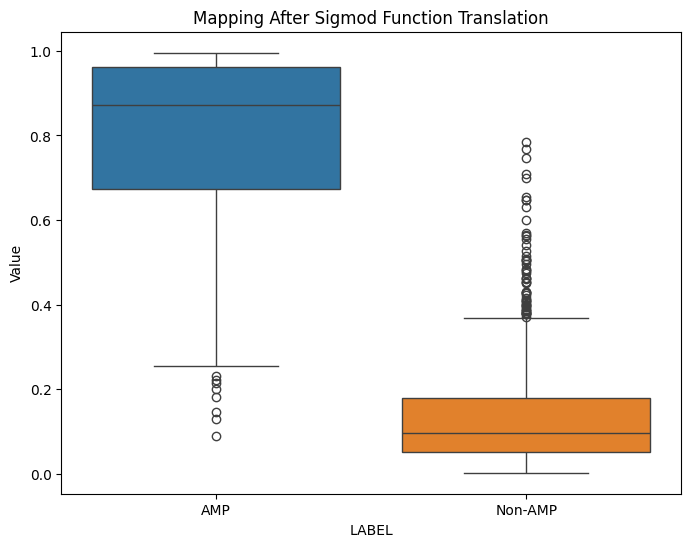

In [42]:
# 合并两个DataFrame
merged_final_df = pd.concat([AMP_predicted_clean, NON_AMP_predicted_clean], ignore_index=True)
merged_final_df['LABEL'] = merged_final_df['LABEL'].replace({0: 'Non-AMP', 1: 'AMP'})
# 使用Seaborn绘制箱线图
plt.figure(figsize=(8, 6))
sns.boxplot(x='LABEL', y='Value', hue='LABEL',data=merged_final_df)
plt.title('Mapping After Sigmod Function Translation')

plt.savefig("C:/Users/Lenovo/Desktop/new_study/CNS/output/XGBoost_regression_boxplot_figures_sofmaxrepaired.png")

plt.show()